# Task: Used Bike prediction



# *   Tasks: 
problems statement:
The main problems of today is bike where pople get scam  due to buy bike without knowing the proper detail so they have to bear more losses for bike with this prediction poeple can get help to get second hand bike




*Analysis Process*
The analysis is divided into ten main parts:

* Data Sourcing, Data Understanding
* Data cleaning, Manipulation, Visulaization and Detecting Outliers
* Perform EDA on Prepared Dataset (Univariate and Bivariate Analysis)
* Model Preparation
* Training and Testing set Data Split
* Model Building
* Making Predictions
* Model Evaluation
* Features Importance


In this Project, we are going to predict the Price of Used Cars using various features like brand, Price, Mileage, power,kms driven,owner etc. 

information about data:

price:
price is our independent value

kms_driven:
how much kilometer has driven


owner:
biker owner based on their bike

age:
how old the bike exactly



power:
how much power does actually have





*Analysis Process*
The analysis is divided into ten main parts:

* Data Sourcing, Data Understanding
* Data cleaning, Manipulation, Visulaization and Detecting Outliers
* Perform EDA on Prepared Dataset (Univariate and Bivariate Analysis)
* Model Preparation
* Training and Testing set Data Split
* Model Building
* Making Predictions
* Model Evaluation
* Features Importance

In [1]:
#importing the necessary library
import pandas as pd     
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

# Importing excel data

In [2]:
#load the data
df = pd.read_csv('bikes.csv')
df.head(5)

,bike_name,price,city,kms_driven,owner,age,power,brand
0,TVS Star City Plus Dual Tone 110cc,35000,Ahmedabad,17654.0,First Owner,3,110.0,TVS
1,Royal Enfield Classic 350cc,119900,Delhi,11000.0,First Owner,4,350.0,Royal Enfield
2,Triumph Daytona 675R,600000,Delhi,110.0,First Owner,8,675.0,Triumph
3,TVS Apache RTR 180cc,65000,Bangalore,16329.0,First Owner,4,180.0,TVS
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000,Bangalore,10000.0,First Owner,3,150.0,Yamaha


In [3]:
df['kms_driven']

0        17654.0
1        11000.0
2          110.0
3        16329.0
4        10000.0
          ...   
32643    22000.0
32644        NaN
32645    20373.0
32646    84186.0
32647    60857.0
Name: kms_driven, Length: 32648, dtype: float64

# Shape of the dataframe

In [4]:
df.shape

(32648, 8)

# Missing value

In [5]:
df.isnull().any()  #checking the missing value

bike_name     False
price         False
city          False
kms_driven     True
owner         False
age           False
power          True
brand          True
dtype: bool

In [6]:
df.isnull().sum()

bike_name     0
price         0
city          0
kms_driven    1
owner         0
age           0
power         1
brand         1
dtype: int64

# Dropping the missing value


In [7]:
df.dropna(inplace = True) 

In [8]:
df.isna().sum() ## if there any missing values

bike_name     0
price         0
city          0
kms_driven    0
owner         0
age           0
power         0
brand         0
dtype: int64

In [9]:
df.isnull()

,bike_name,price,city,kms_driven,owner,age,power,brand
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
32641,False,False,False,False,False,False,False,False
32642,False,False,False,False,False,False,False,False
32643,False,False,False,False,False,False,False,False
32645,False,False,False,False,False,False,False,False


# Drop the feature that are not required to build our model

In [10]:
df.drop(labels='city',axis=1,inplace=True)

In [11]:
df.drop(labels='bike_name',axis=1,inplace=True)

In [12]:
df

,price,kms_driven,owner,age,power,brand
0,35000,17654.0,First Owner,3,110.0,TVS
1,119900,11000.0,First Owner,4,350.0,Royal Enfield
2,600000,110.0,First Owner,8,675.0,Triumph
3,65000,16329.0,First Owner,4,180.0,TVS
4,80000,10000.0,First Owner,3,150.0,Yamaha
...,...,...,...,...,...,...
32641,41000,20245.0,Second Owner,11,220.0,Bajaj
32642,15000,35000.0,Second Owner,19,100.0,Hero
32643,39000,22000.0,First Owner,4,100.0,Hero
32645,60000,20373.0,First Owner,6,220.0,Bajaj


In [13]:
# df.max()

In [14]:
df

,price,kms_driven,owner,age,power,brand
0,35000,17654.0,First Owner,3,110.0,TVS
1,119900,11000.0,First Owner,4,350.0,Royal Enfield
2,600000,110.0,First Owner,8,675.0,Triumph
3,65000,16329.0,First Owner,4,180.0,TVS
4,80000,10000.0,First Owner,3,150.0,Yamaha
...,...,...,...,...,...,...
32641,41000,20245.0,Second Owner,11,220.0,Bajaj
32642,15000,35000.0,Second Owner,19,100.0,Hero
32643,39000,22000.0,First Owner,4,100.0,Hero
32645,60000,20373.0,First Owner,6,220.0,Bajaj


# Data exploration

The probability distribution will show us how that variable is distributed

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'bike Price Distribution Plot')

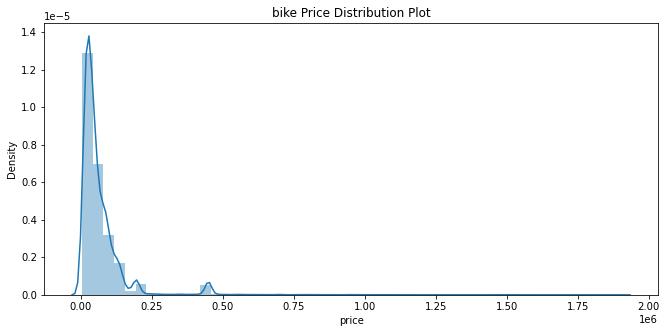

In [15]:
#finding the anamolies ,outliers
plt.figure(figsize=[11,5])
sns.distplot(df['price'])
plt.title('bike Price Distribution Plot') #so there is no outliers in the price

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'bike kms_driven Distribution Plot')

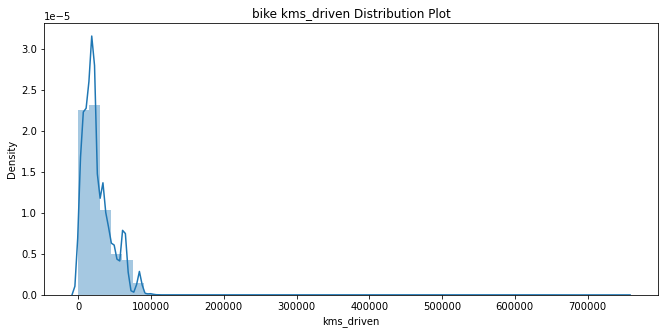

In [16]:
#model_year distribution plot
plt.figure(figsize=[11,5])
sns.distplot(df['kms_driven'])
plt.title('bike kms_driven Distribution Plot') 

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'bike power Distribution Plot')

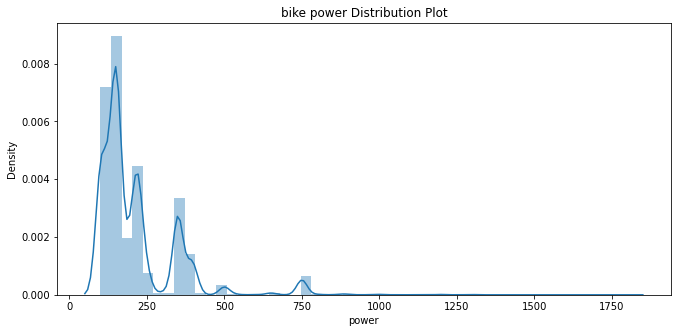

In [17]:
#model_year distribution plot
plt.figure(figsize=[11,5])
sns.distplot(df['power'])
plt.title('bike power Distribution Plot') 

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'bike age Distribution Plot')

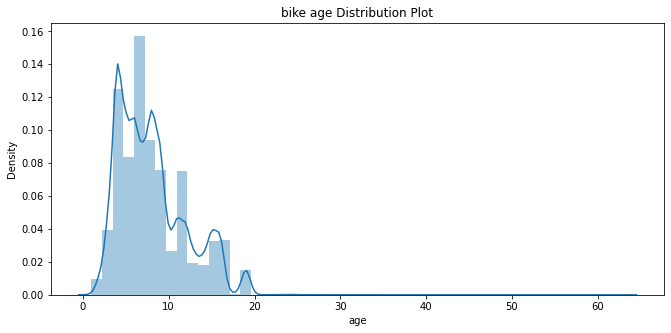

In [18]:
#model_year distribution plot
plt.figure(figsize=[11,5])
sns.distplot(df['age'])
plt.title('bike age Distribution Plot') 

Now its clear that there is not more outliers presents in ages, power, kms_Driven and prices

# Data visulization

Data Exploration & Visualization

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'owner Vs knm_Driven')

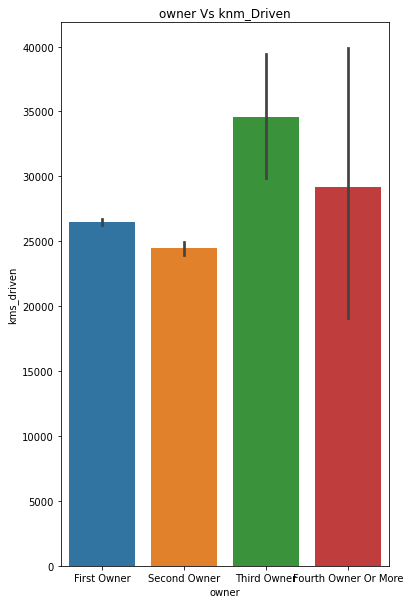

In [22]:
# Lets see the visulization of oowner based on bike price
plt.figure(figsize=[20,10])
plt.subplot(1,3,1)
sns.barplot(df['owner'], df['kms_driven'])
plt.title('owner Vs knm_Driven')

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'age Vs price')

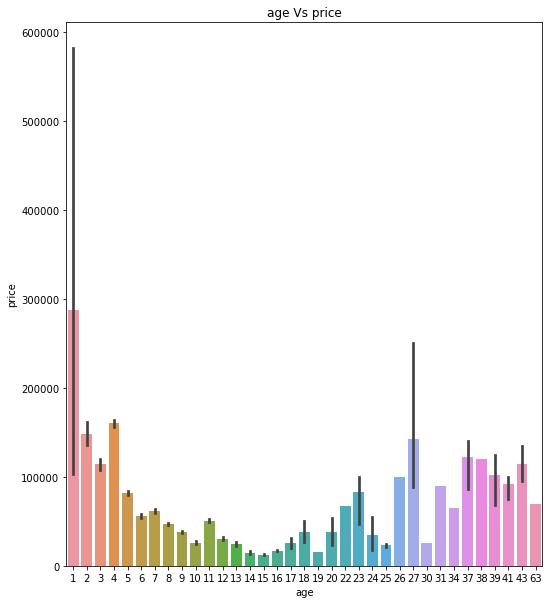

In [23]:
#bike on the basis of age and prices
plt.figure(figsize=[29,10])
plt.subplot(1,3,1)
sns.barplot(df['age'], df['price'])
plt.title('age Vs price')

<AxesSubplot:xlabel='brand', ylabel='price'>

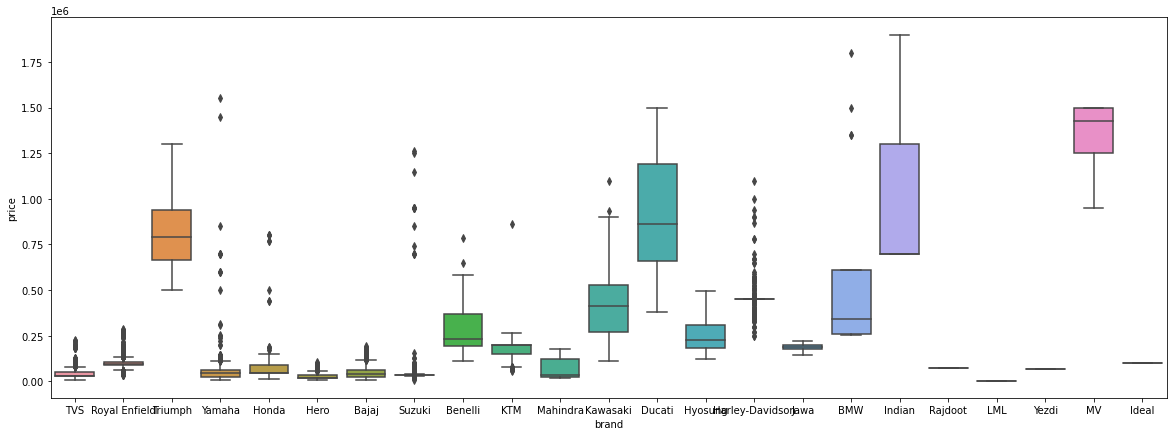

In [24]:
plt.subplots(figsize=(20,7))  #brand anusar price
sns.boxplot(x='brand',y='price',data=df)

In [25]:
df

,price,kms_driven,owner,age,power,brand
0,35000,17654.0,First Owner,3,110.0,TVS
1,119900,11000.0,First Owner,4,350.0,Royal Enfield
2,600000,110.0,First Owner,8,675.0,Triumph
3,65000,16329.0,First Owner,4,180.0,TVS
4,80000,10000.0,First Owner,3,150.0,Yamaha
...,...,...,...,...,...,...
32641,41000,20245.0,Second Owner,11,220.0,Bajaj
32642,15000,35000.0,Second Owner,19,100.0,Hero
32643,39000,22000.0,First Owner,4,100.0,Hero
32645,60000,20373.0,First Owner,6,220.0,Bajaj


# Handle categorical value

In [26]:
print(df['brand'].unique())
print(df['owner'].unique())


['TVS' 'Royal Enfield' 'Triumph' 'Yamaha' 'Honda' 'Hero' 'Bajaj' 'Suzuki'
 'Benelli' 'KTM' 'Mahindra' 'Kawasaki' 'Ducati' 'Hyosung'
 'Harley-Davidson' 'Jawa' 'BMW' 'Indian' 'Rajdoot' 'LML' 'Yezdi' 'MV'
 'Ideal']
['First Owner' 'Second Owner' 'Third Owner' 'Fourth Owner Or More']


In [27]:
df = df.drop(labels='brand', axis=1)

In [28]:
clean_data = pd.get_dummies(df,drop_first=True)
clean_data.head()

,price,kms_driven,age,power,owner_Fourth Owner Or More,owner_Second Owner,owner_Third Owner
0,35000,17654.0,3,110.0,0,0,0
1,119900,11000.0,4,350.0,0,0,0
2,600000,110.0,8,675.0,0,0,0
3,65000,16329.0,4,180.0,0,0,0
4,80000,10000.0,3,150.0,0,0,0


# Model deveopment 

Declaring dependent and independent variables

In [29]:
X = clean_data.drop('price',axis=1)
y = clean_data['price']

# Traning and Testing data

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0)

# Linear regression model

In [31]:
# Model Building

lr = LinearRegression()


In [32]:
lr.fit(X_train,y_train)

LinearRegression()

# Accuracy of model

In [33]:
y_pred = lr.predict(X_test)

In [34]:
r_squared = r2_score(y_test,y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("R_squared :",r_squared)
print("RMSE :",rmse)

R_squared : 0.7537996951298603
RMSE : 46205.60904518063


In [35]:
lr.score(X_test,y_test)

0.7537996951298603

# Random Forest Regressor Model

In [36]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [37]:
# Training Model
rf.fit(X_train,y_train)

RandomForestRegressor()

In [38]:
rf.score(X_test,y_test)

0.9435221556607067

In [39]:
# Model Summary
y_pred_rf = rf.predict(X_test)


# Accuracy of model

In [40]:
r_squared = r2_score(y_test,y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_rf))
print("R_squared :",r_squared)
print("RMSE :",rmse)

R_squared : 0.7537996951298603
RMSE : 22130.41010286885


# Hyperparameter optimization using RandomizedSearchCV

In [41]:
from sklearn.model_selection import RandomizedSearchCV

In [42]:
 #Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 7)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth =  list(np.linspace(5, 1200, 10, dtype = int)) + [None]

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [43]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [10, 41, 73, 105, 136, 168, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 137, 270, 403, 536, 668, 801, 934, 1067, 1200, None], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [44]:
rf = RandomForestRegressor()

In [45]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)


In [46]:
rf_random.fit(X_train,y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=403, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   2.4s
[CV] END max_depth=403, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   2.4s
[CV] END max_depth=403, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   2.4s
[CV] END max_depth=403, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   2.4s
[CV] END max_depth=403, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   2.4s
[CV] END max_depth=536, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=200; total time=   1.2s
[CV] END max_depth=536, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=200; total time=   1.2s
[CV] END max_depth=536, max_features=sqrt, min_samples_leaf=1, min_samples_split=10

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 137, 270, 403, 536,
                                                      668, 801, 934, 1067, 1200,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [10, 41, 73, 105, 136,
                                                         168, 200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [47]:
rf_random.best_params_

{'n_estimators': 105,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 536}

In [48]:
predictions=rf_random.predict(X_test)

In [49]:
import sklearn.metrics as metrics
metrics.r2_score(y_test,predictions)

0.9456260555351904

In [50]:
rf_random

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 137, 270, 403, 536,
                                                      668, 801, 934, 1067, 1200,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [10, 41, 73, 105, 136,
                                                         168, 200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [51]:
# sns.distplot(y_test-predictions)

In [52]:
# plt.scatter(y_test,predictions)

In [53]:
# from sklearn import metrics
# print('MAE:', metrics.mean_absolute_error(y_test, predictions))
# print('MSE:', metrics.mean_squared_error(y_test, predictions))
# print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

# Feature selection

In [62]:
# necessary imports:
# from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# Your Code Here(Uncomment best_features and write your code):
best_features = SelectKBest(k='all')
fit = best_features.fit(X,y) 

In [63]:
SelectKBest()

SelectKBest()

In [64]:
# Storing features and there score value in dataframes:
dfscores = pd.DataFrame(fit.scores_)
dfcoloumns = pd.DataFrame(df.columns)
# Concat two dataframes for better visualization
df_scores = pd.concat([dfcoloumns, dfscores], axis = 1)
df_scores.columns = ["X", "price"] # naming the dataframe Coloumns
# saving dataframe to csv
name = "feature_scores"
df_scores.to_csv(name)
df_scores.head()

,X,price
0,price,34.165711
1,kms_driven,82.134562
2,owner,223.252154
3,age,3.953788
4,power,36.566847


In [65]:
# Important feature using ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor  #To know about extraTreesRegressor library
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [66]:
print(feat_importances.sort_values(ascending=False))

NameError: name 'feat_importances' is not defined

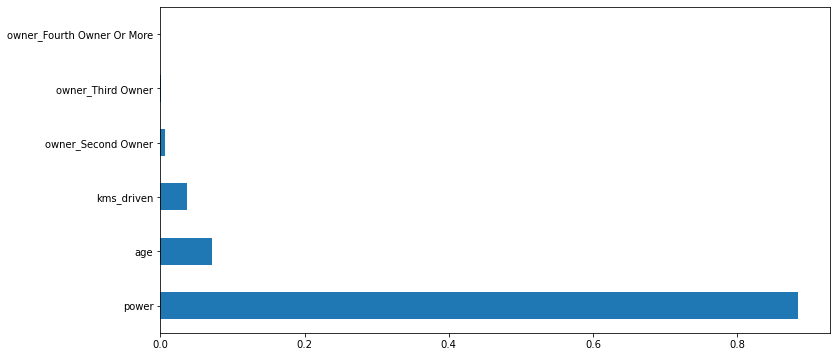

In [67]:
# plot graph of feature importances for better visualization
plt.figure(figsize=[12,6])
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(6).plot(kind='barh')
plt.show()

In [68]:
clean_data.head()

,price,kms_driven,age,power,owner_Fourth Owner Or More,owner_Second Owner,owner_Third Owner
0,35000,17654.0,3,110.0,0,0,0
1,119900,11000.0,4,350.0,0,0,0
2,600000,110.0,8,675.0,0,0,0
3,65000,16329.0,4,180.0,0,0,0
4,80000,10000.0,3,150.0,0,0,0


In [69]:
df

,price,kms_driven,owner,age,power
0,35000,17654.0,First Owner,3,110.0
1,119900,11000.0,First Owner,4,350.0
2,600000,110.0,First Owner,8,675.0
3,65000,16329.0,First Owner,4,180.0
4,80000,10000.0,First Owner,3,150.0
...,...,...,...,...,...
32641,41000,20245.0,Second Owner,11,220.0
32642,15000,35000.0,Second Owner,19,100.0
32643,39000,22000.0,First Owner,4,100.0
32645,60000,20373.0,First Owner,6,220.0


In [70]:
# Selecting useful features.
final_df =df[['price', 'age',
       'power','owner']]

In [71]:
final_df

,price,price,age,power,owner
0,35000,35000,3,110.0,First Owner
1,119900,119900,4,350.0,First Owner
2,600000,600000,8,675.0,First Owner
3,65000,65000,4,180.0,First Owner
4,80000,80000,3,150.0,First Owner
...,...,...,...,...,...
32641,41000,41000,11,220.0,Second Owner
32642,15000,15000,19,100.0,Second Owner
32643,39000,39000,4,100.0,First Owner
32645,60000,60000,6,220.0,First Owner


# Categorical Features


In [72]:
#Creating Dummie Variables
data_with_dummies = pd.get_dummies(final_df,drop_first=True)

In [73]:
data_with_dummies.head()


,price,price,age,power,owner_Fourth Owner Or More,owner_Second Owner,owner_Third Owner
0,35000,35000,3,110.0,0,0,0
1,119900,119900,4,350.0,0,0,0
2,600000,600000,8,675.0,0,0,0
3,65000,65000,4,180.0,0,0,0
4,80000,80000,3,150.0,0,0,0


# Again declaring the model

In [74]:
x = data_with_dummies.drop('price',axis=1)
y = data_with_dummies['price']

In [75]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [76]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=365)

In [77]:
# Model Building
from sklearn.linear_model import LinearRegression
lr = LinearRegression()


In [78]:

# Training Model
lr.fit(x_train,y_train)

LinearRegression()

In [79]:
lr.score(x_test,y_test)

0.7527456335959296

In [80]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

# Training Model
rf.fit(x_train,y_train)

# Model Summary
y_pred_rf = rf.predict(x_test)

r_squared = r2_score(y_test,y_pred_rf)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_rf))
print("R_squared :",r_squared)

R_squared : 0.9398062487638331


In [81]:
rf.score(x_test,y_test)

0.9398062487638331

# Conclusion

From the given model i came an conclusion that both MOdel has increased when hypertuining has done.when i had build a primary model the accuecy is 0.87 using linear regresion and in using the random forest accuracy is 0.90

when doing feature selection the hyperparameter tuinig has the less accuracy    

there seems the different accuracy between linear regression and decision tree

Price of bike with brand type is higher
price of bike with power types is lower
